In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/body-fat-prediction-dataset")

print("Path to dataset files:", path)

/mnt/d/Forschung/Body-Fat-Prediction/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/kesslermatics/.cache/kagglehub/datasets/fedesoriano/body-fat-prediction-dataset/versions/1


In [2]:
import pandas as pd
import os

# Load the dataset CSV file from the downloaded path
csv_file = os.path.join(path, "bodyfat.csv")
df = pd.read_csv(csv_file)

# Display the first few rows of the dataset
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Prepare lists to store metrics
train_losses = []
val_losses = []

df["BMI"] = df["Weight"] / (df["Height"] ** 2) * 703
df["WaistHipRatio"] = df["Abdomen"] / df["Hip"]

selected_features = ["Wrist", "BMI", "WaistHipRatio", "Neck", "Forearm", "Thigh", "Hip", "Biceps", "Ankle"]
X = df[selected_features]
y = df["BodyFat"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=100, batch_size=16, verbose=1)


2025-04-20 09:45:49.666312: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745135150.553103    1374 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745135150.793372    1374 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745135152.880412    1374 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745135152.880459    1374 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745135152.880461    1374 computation_placer.cc:177] computation placer alr

Epoch 1/100


W0000 00:00:1745135200.515434    1374 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 440.0432 - mae: 19.2278 - val_loss: 313.5437 - val_mae: 16.5132
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 347.5561 - mae: 16.7807 - val_loss: 276.3593 - val_mae: 15.4261
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 357.1007 - mae: 16.7956 - val_loss: 233.7647 - val_mae: 14.0131
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 278.7950 - mae: 14.7684 - val_loss: 190.0092 - val_mae: 12.3071
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 230.9474 - mae: 13.1192 - val_loss: 148.5811 - val_mae: 10.7509
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 187.4466 - mae: 11.9221 - val_loss: 125.2968 - val_mae: 9.2686
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 120.5356 - mae: 9.4735 - val_loss: 130.0229 - val_mae: 8.6523
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 122.4946 - mae: 9.5345 - val_loss: 141.0941 - val_mae: 8.4174
Epoch 9/100
13/13 ━━━━━━━━━━━━━━

Epoch 1/100 | Train Loss: 447.5503 | Val Loss: 354.0931 | Val MAE: 17.5452
Epoch 11/100 | Train Loss: 93.1008 | Val Loss: 144.4379 | Val MAE: 8.0569
Epoch 21/100 | Train Loss: 41.1961 | Val Loss: 62.1571 | Val MAE: 5.3454
Epoch 31/100 | Train Loss: 26.9128 | Val Loss: 38.5931 | Val MAE: 4.3147
Epoch 41/100 | Train Loss: 22.2423 | Val Loss: 29.3487 | Val MAE: 3.9320
Epoch 51/100 | Train Loss: 19.8673 | Val Loss: 24.0270 | Val MAE: 3.6840
Epoch 61/100 | Train Loss: 18.4586 | Val Loss: 21.6887 | Val MAE: 3.5418
Epoch 71/100 | Train Loss: 17.4964 | Val Loss: 21.3722 | Val MAE: 3.5029
Epoch 81/100 | Train Loss: 17.2139 | Val Loss: 19.9426 | Val MAE: 3.4215
Epoch 91/100 | Train Loss: 15.9199 | Val Loss: 19.2875 | Val MAE: 3.4225
Epoch 100/100 | Train Loss: 15.3117 | Val Loss: 19.3530 | Val MAE: 3.4012


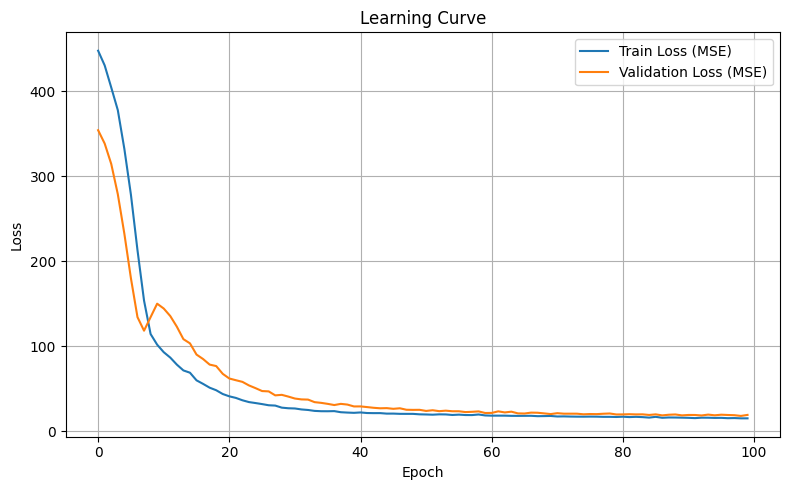

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare lists to store metrics
train_losses = []
val_losses = []
# Engineered features
df["BMI"] = df["Weight"] / (df["Height"] ** 2) * 703
df["WaistHipRatio"] = df["Abdomen"] / df["Hip"]

# Feature selection
selected_features = ["Wrist", "BMI", "WaistHipRatio", "Neck", "Forearm", "Thigh", "Hip", "Biceps", "Ankle"]
X = df[selected_features].values.astype(np.float32)
y = df["BodyFat"].values.astype(np.float32).reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create DataLoaders
train_ds = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
test_ds = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16)

# Define model
class BodyFatNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

model = BodyFatNN(input_dim=X.shape[1])

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(100):
    model.train()
    epoch_train_loss = 0.0
    for xb, yb in train_loader:
        preds = model(xb)
        loss = criterion(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_preds = model(torch.tensor(X_test))
        val_loss = criterion(val_preds, torch.tensor(y_test))
        val_losses.append(val_loss.item())

    # Print every 10 epochs
    if epoch % 10 == 0 or epoch == 99:
        val_mae = torch.mean(torch.abs(val_preds - torch.tensor(y_test)))
        print(f"Epoch {epoch+1}/100 | Train Loss: {avg_train_loss:.4f} | Val Loss: {val_loss.item():.4f} | Val MAE: {val_mae.item():.4f}")

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss (MSE)')
plt.plot(val_losses, label='Validation Loss (MSE)')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()